# Exploratory Data Analysis (2014 - Present)
In this EDA we'll look at all the data we have from 2014 onwards. This will include:

1. Recruiting class information, including blue-chip ratio
2. Previous success information, including team ELO ratings and number of wins
3. Returning talent metrics from previous season

**Note:** For predicting season in year n, we need the returning players and recruiting info for year n and the season statistics and wins from year n-1.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get Recruiting with Season Stats Data

#### Team Records

In [57]:
# Get records for teams
records_df = pd.read_csv('./data/team_records_by_year.csv')

# Keep only records from 2010 for proper merging
records_2014_df = records_df[records_df.year >= 2014].copy()

# Remove some not needed columns
records_2014_df = records_2014_df.drop(columns=['home_wins', 'home_losses', 'away_wins', 'away_losses'], axis=1)
records_2014_df.head()

,team,team_id,year,conference,games_played,expected_wins,wins,losses
1657,Air Force,2005,2014,Mountain West,13,9.7,10,3
1658,Akron,2006,2014,Mid-American,12,5.4,5,7
1659,Alabama,333,2014,SEC,14,11.7,12,2
1660,Appalachian State,2026,2014,Sun Belt,12,8.1,7,5
1661,Arizona,12,2014,Pac-12,14,8.8,10,4


In [58]:
records_2014_df[records_2014_df.team == 'Maryland']

,team,team_id,year,conference,games_played,expected_wins,wins,losses
1709,Maryland,120,2014,Big Ten,13,5.0,7,6
1837,Maryland,120,2015,Big Ten,12,3.8,3,9
1964,Maryland,120,2016,Big Ten,13,5.4,6,7
2092,Maryland,120,2017,Big Ten,12,3.1,4,8
2222,Maryland,120,2018,Big Ten,12,6.0,5,7
2352,Maryland,120,2019,Big Ten,12,3.3,3,9
2481,Maryland,120,2020,Big Ten,5,2.3,2,3
2610,Maryland,120,2021,Big Ten,13,6.1,7,6
2741,Maryland,120,2022,Big Ten,13,6.8,8,5
2873,Maryland,120,2023,Big Ten,13,8.7,8,5


#### Recruiting

In [59]:
# Get recruiting info
recruiting_df = pd.read_csv('./data/team_recruiting_w_blue_chip_ratios.csv')

# Filter the years we need
recruiting_2014_df = recruiting_df[recruiting_df.year >= 2014].copy()

# Remove/rename some columns
recruiting_2014_df = recruiting_2014_df.drop(columns=['total', 'blue_sums', 'total_sums'])
recruiting_2014_df = recruiting_2014_df.rename(columns={'rank': 'recruiting_rank'})
recruiting_2014_df.head()

,team,year,recruiting_rank,points,blue_chip,blue_chip_ratio
654,Alabama,2014,1,319.71,20.0,0.755319
655,LSU,2014,2,299.29,16.0,0.659341
656,Ohio State,2014,3,296.08,16.0,0.673684
657,Florida State,2014,4,286.79,15.0,0.586957
658,Texas A&M,2014,5,278.08,12.0,0.459770


In [60]:
recruiting_2014_df.year.max()

2024

#### Returning Talent
- Need year n to predict year n
- Note that we don't need the conference here also some of the conferences aren't updated
- ex. Maryland is listed in 2014 as being in ACC, but they moved to the Big Ten for the 2014-2015 season

In [61]:
returning_df = pd.read_csv('data/returning_players_2014.csv')
returning_df = returning_df.drop(columns=['conference']).copy()
returning_df.head()

,year,team,passing_usage,rushing_usage,usages
0,2014,Air Force,0.751,0.652,0.684
1,2014,Akron,1.000,0.989,0.952
2,2014,Alabama,0.078,0.911,0.589
3,2014,Arizona,0.000,0.048,0.142
4,2014,Arizona State,0.990,0.562,0.713


In [62]:
returning_df[(returning_df.team == 'Maryland')]

,year,team,passing_usage,rushing_usage,usages
51,2014,Maryland,1.000,0.991,0.946
178,2015,Maryland,0.107,0.601,0.340
307,2016,Maryland,0.946,0.615,0.799
435,2017,Maryland,0.311,0.554,0.422
564,2018,Maryland,0.851,0.957,0.792
694,2019,Maryland,0.311,0.748,0.587
824,2020,Maryland,0.665,0.318,0.501
953,2021,Maryland,0.913,0.472,0.675
1081,2022,Maryland,0.964,0.476,0.676
1212,2023,Maryland,0.975,0.979,0.880


#### ELO/FPI Ratings
- Need year n-1 to predict year n

In [63]:
ratings_df = pd.read_csv('data/team_conference_ratings.csv')
ratings_2014_df = ratings_df[ratings_df.year >= 2014].copy()
ratings_2014_df.head()

,team,year,conference,elo,fpi,conference_rating
978,Air Force,2014,Mountain West,1432.0,-2.584,-5.466667
979,Akron,2014,Mid-American,1221.0,-10.663,-9.507692
980,Alabama,2014,SEC,2130.0,26.766,17.957143
981,Appalachian State,2014,Sun Belt,1475.0,-5.620,-9.990909
982,Arizona,2014,Pac-12,1723.0,14.145,9.541667


#### Last Season Advanced Stats
- Need year n-1 to predict year n
- Drop the conference column here as well as there are some years where the conference was not updated after a switch was made

In [64]:
stats_df = pd.read_csv('data/advanced_stats_seasons.csv')

# Switch names of a few categories and drop uneeded columns
stats_df = stats_df.rename(columns={'season': 'year'})
stats_df = stats_df.drop(columns=['offense', 'defense', 'conference'])

# Switch year by 1 so we're getting last seasons stats
stats_df['year'] = stats_df['year'] + 1

# Filter data from 2014 - 2023 (10 years of data)
stats_2014_df = stats_df[stats_df['year'] >= 2014].copy()
stats_2014_df.head()

,year,team,off_drives,def_drives,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate
12,2014,Air Force,139,137,0.860561,0.902638,0.096601,0.214295,0.439644,0.518913
13,2015,Air Force,165,161,1.089935,1.425767,0.207059,0.138795,0.451837,0.375831
14,2016,Air Force,177,173,1.154045,1.549206,0.272449,0.172654,0.474216,0.357631
15,2017,Air Force,147,148,1.027586,1.534094,0.227697,0.158770,0.483333,0.366048
16,2018,Air Force,138,139,1.095699,1.374592,0.235542,0.247661,0.488398,0.422096


### Combine Features
1. records_2014_df
2. recruiting_2014_df
3. returning_df
4. ratings_2014_df

In [65]:
df = records_2014_df.merge(ratings_2014_df, on=['year', 'team', 'conference']) \
                        .merge(recruiting_2014_df, on=['year', 'team']) \
                        .merge(returning_df, on=['year', 'team']) \
                        .merge(stats_2014_df, on=['year', 'team'])
df.head()

,team,team_id,year,conference,games_played,expected_wins,wins,losses,elo,fpi,...,rushing_usage,usages,off_drives,def_drives,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate
0,Air Force,2005,2014,Mountain West,13,9.7,10,3,1432.0,-2.584,...,0.652,0.684,139,137,0.860561,0.902638,0.096601,0.214295,0.439644,0.518913
1,Akron,2006,2014,Mid-American,12,5.4,5,7,1221.0,-10.663,...,0.989,0.952,149,156,0.973352,0.952424,0.023091,0.066849,0.385876,0.405172
2,Alabama,333,2014,SEC,14,11.7,12,2,2130.0,26.766,...,0.911,0.589,143,150,0.915606,0.912426,0.185958,-0.008829,0.501961,0.379076
3,Arizona,12,2014,Pac-12,14,8.8,10,4,1723.0,14.145,...,0.048,0.142,168,173,0.848512,0.930193,0.100022,0.033014,0.451943,0.402116
4,Arizona State,9,2014,Pac-12,13,9.7,10,3,1775.0,14.153,...,0.562,0.713,194,189,0.905857,1.075455,0.088031,0.090247,0.449318,0.383734


In [66]:
df.columns

Index(['team', 'team_id', 'year', 'conference', 'games_played',
       'expected_wins', 'wins', 'losses', 'elo', 'fpi', 'conference_rating',
       'recruiting_rank', 'points', 'blue_chip', 'blue_chip_ratio',
       'passing_usage', 'rushing_usage', 'usages', 'off_drives', 'def_drives',
       'off_explode', 'def_explode', 'off_ppa', 'def_ppa', 'off_success_rate',
       'def_success_rate'],
      dtype='object')

#### Correlations between features

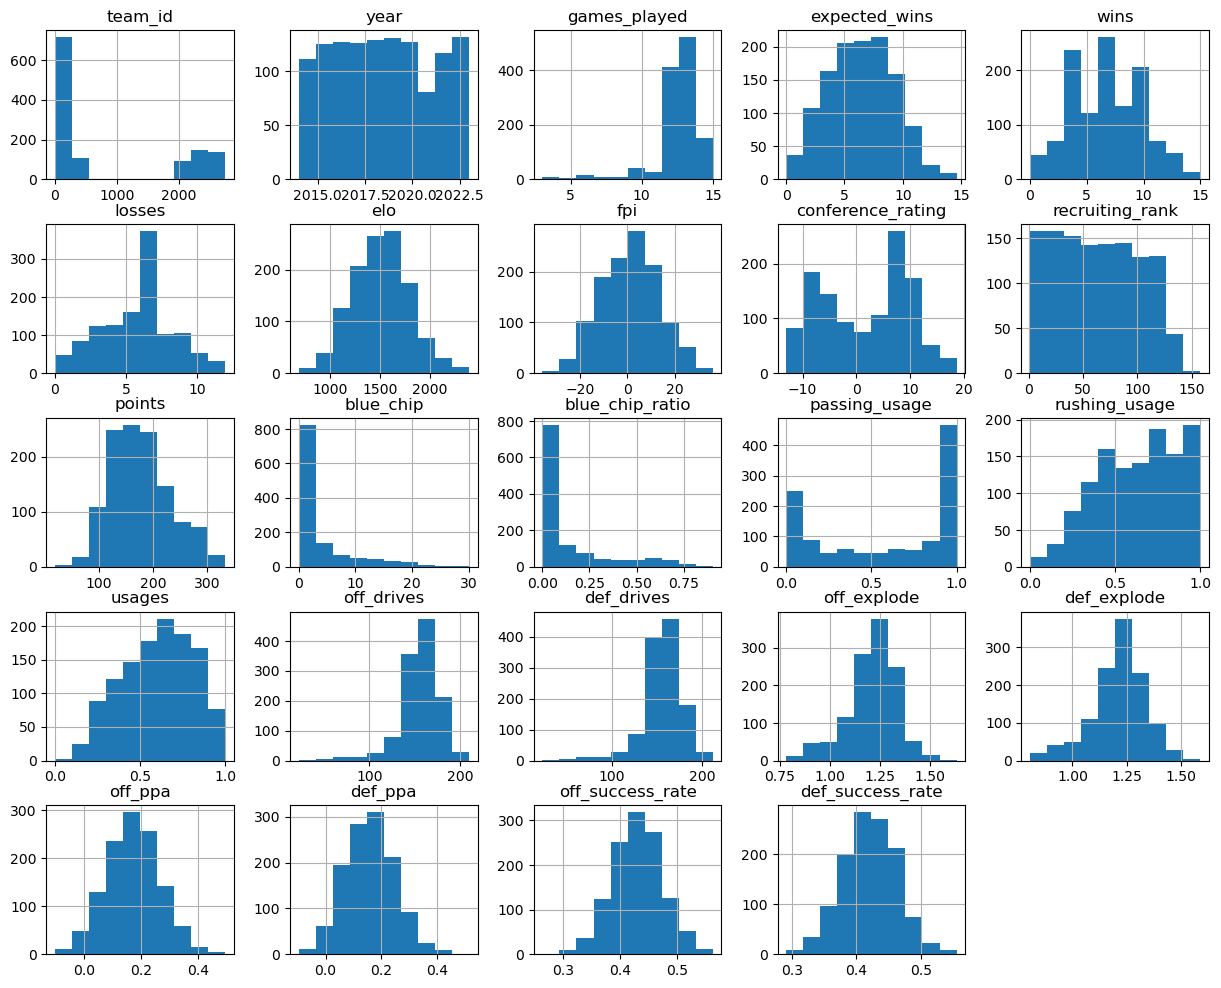

In [67]:
df.hist(figsize=(15,12))
plt.show()

In [44]:
df.columns

Index(['team', 'team_id', 'year', 'conference', 'games_played',
       'expected_wins', 'wins', 'losses', 'elo', 'fpi', 'conference_rating',
       'recruiting_rank', 'points', 'blue_chip', 'blue_chip_ratio',
       'passing_usage', 'rushing_usage', 'usages', 'off_drives', 'def_drives',
       'off_explode', 'def_explode', 'off_ppa', 'def_ppa'],
      dtype='object')

#### Correlations between Numeric Features

In [69]:
# Get numeric features
numeric = df[['wins', 'losses', 'games_played', 'elo', 'fpi', 'conference_rating', 'recruiting_rank', 
              'points', 'blue_chip_ratio', 'passing_usage', 'rushing_usage', 'off_success_rate', 'def_success_rate',
              'usages', 'off_drives', 'def_drives', 'off_explode', 'def_explode', 'off_ppa', 'def_ppa']]

# Look at correlations across all years 

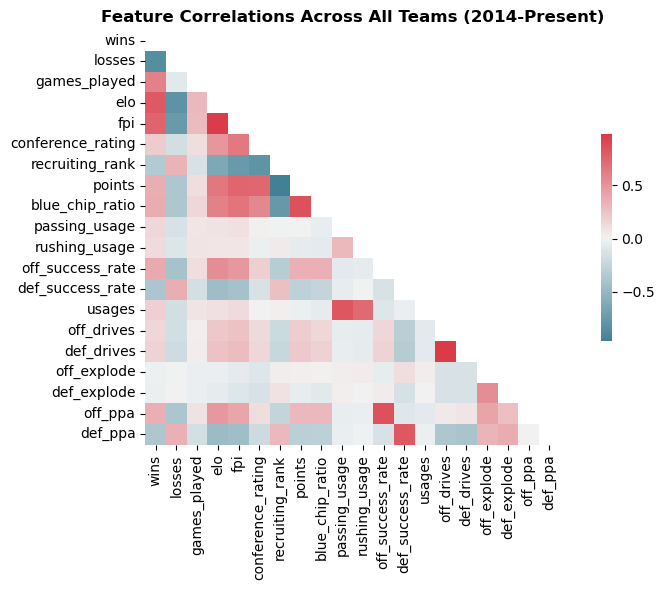

In [71]:
# Calculate the correlations amongst features 
corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

# Create nicer lower triangular seaborn correlation heatmap. Use diverging color palette to get -1,0,1
fig, ax = plt.subplots(figsize=(9,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, # Data
            mask=mask, # Mask certain cells
            cmap=cmap, # Colormap
            square=True, # Make squares
            #annot=True, # Show values
            #annot_kws={'size':6},
            #vmax=0.5, # Set scale for colors (all above will have same)
            #vmin=-0.5, # Min scale
            center=0, # Force center which is white for diverging palette
            #linewidths=0.5, # Width of line between squares
            cbar_kws={'shrink':0.5}) # Size of legend
plt.title('Feature Correlations Across All Teams (2014-Present)', fontweight='bold')
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png')

#### Old: Cleaning Conference Data

Differences in conferences are appearing when teams switched conferences in a given year:
1. Louisville: American Athletic -> ACC in 2014
2. Maryland: ACC -> Maryland in 2014
3. New Mexico State  -> Independent in 2013, Sun Belt 2014-2017, Independent 2018-2022, Conference USA 2023 - Present
4. Rutgers -> Big East 1991-2012, AAC in 2013, Big Tem 2014-Present
5. Western Kentucky -> 99-2000 (Ohio Valley), 2001-2006 (Gateway Football Conference), 2007 (FCS Ind), 2008 (FBS Independent), 2009-2014 (Sun Belt), 2014-Present Conference USA
6. Navy 

In [10]:
# Note above that we didn't merge on conference, because some teams chan
(df.conference_x == df.conference_y).value_counts()

True     1181
False      23
Name: count, dtype: int64

In [19]:
df[df.conference_x != df.conference_y][['team', 'year', 'conference_x', 'conference_y']]

,team,year,conference_x,conference_y
43,Louisville,2014,ACC,American Athletic
46,Maryland,2014,Big Ten,ACC
59,New Mexico State,2014,Sun Belt,FBS Independents
76,Rutgers,2014,Big Ten,American Athletic
106,Western Kentucky,2014,Conference USA,Sun Belt
173,Navy,2015,American Athletic,FBS Independents
345,UMass,2016,FBS Independents,Mid-American
558,New Mexico State,2018,FBS Independents,Sun Belt
1003,Marshall,2022,Sun Belt,Conference USA
1027,Old Dominion,2022,Sun Belt,Conference USA
